In [1]:
import os
import numpy as np
import arff
from scipy.io import loadmat
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
def compute_correlations(mat):
    corr_mat = np.corrcoef(mat, rowvar=False)
    return corr_mat

def compute_dist(mat):
    dist_mat = cdist(mat, mat, metric='euclidean')
    return np.sqrt(dist_mat)

In [3]:
def plot_distances_correlations(names, datasets):
    fig, ax = plt.subplots(2, len(datasets), figsize=(5 * len(datasets), 10))
    plt.tight_layout()

    for id, (name, dataset) in enumerate(zip(names, datasets)):
        corr = compute_correlations(dataset)
        cax = ax[0, id].imshow(corr, cmap='viridis', interpolation='nearest')
        cbar = fig.colorbar(cax, ax=ax[0, id])
        cbar.ax.tick_params(labelsize=16) 
        ax[0, id].set_title(name + ' ' + 'feat. corr.', fontsize=18)
        ax[0, id].set_xticks([])
        ax[0, id].set_yticks([])

        dist = compute_dist(dataset)
        cax = ax[1, id].imshow(dist, cmap='viridis', interpolation='nearest')
        cbar = fig.colorbar(cax, ax=ax[1, id])
        cbar.ax.tick_params(labelsize=16) 
        ax[1, id].set_title(name + ' ' + 'feat. dist.', fontsize=18)
        ax[1, id].set_xticks([])
        ax[1, id].set_yticks([])
    
    plt.show()
    return

In [4]:
train_path = '../datasets/yeast/yeast-train.arff'
num_features = 103
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
yeast_train_features = train_data[:, :num_features]

In [5]:
trainpath = '../datasets/VirusPseAAC/VirusPseAAC207_train_MVMD.mat'
train_ = loadmat(trainpath)
virus_train_features = train_['transformed_train_data']

In [6]:
train_path = '../datasets/flags/flags-train.arff'
num_features = 19
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
flags_train_features = train_data[:, :num_features]

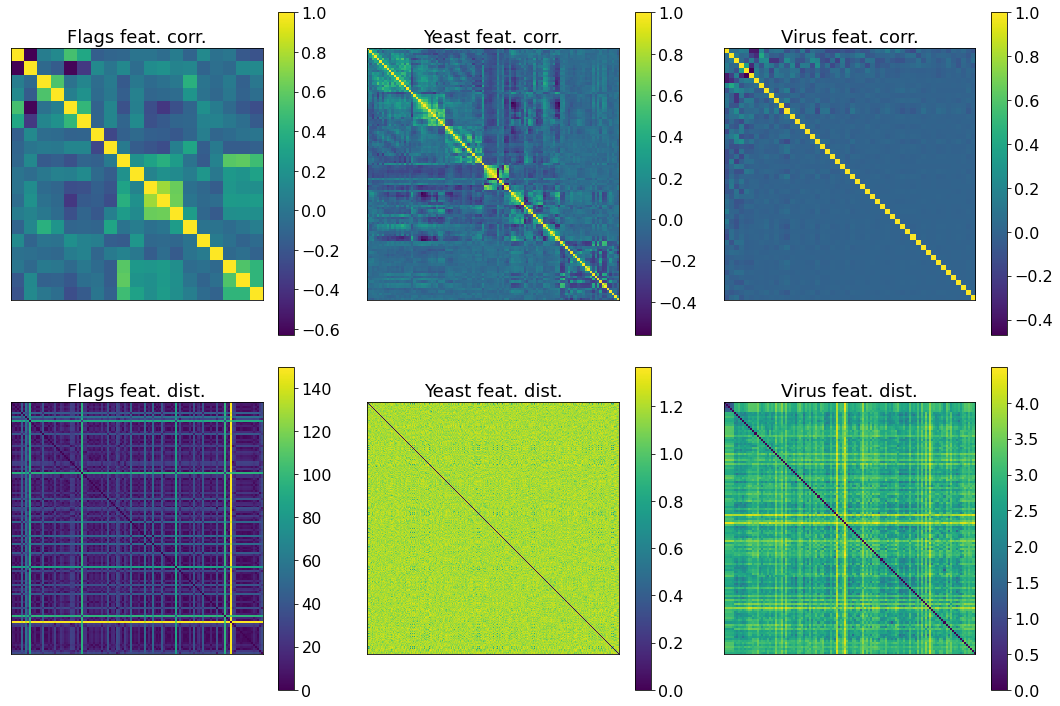

In [7]:
plot_distances_correlations(['Flags', 'Yeast', 'Virus'], [flags_train_features, yeast_train_features, virus_train_features])